<a href="https://colab.research.google.com/github/MainakRepositor/Data-Analysis/blob/master/Car_Features_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAR FEATURES ANALYSIS

<hr>

## 1. Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
print("Necessary libaries are included successfully!")

Necessary libaries are included successfully!


## 2. Importing the datasets

In [2]:
url = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/auto-mpg.csv'
df = pd.read_csv(url,error_bad_lines=False)
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


## 3. Data Exploration

In [3]:
r,c = df.shape
print("Number of rows    =",r)
print("Number of columns =",c)

Number of rows    = 398
Number of columns = 9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


## 4. Handling Wrong Datatypes

In [5]:
df['horsepower'] = df['horsepower'].str.replace('?','')
df['horsepower'] = pd.to_numeric(df['horsepower'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


## 5. Checking for Missing values

In [6]:
print("Are there any missing values in the dataset ?",df.isnull().values.any())

Are there any missing values in the dataset ? True


In [7]:
print("Displaying a column-wise stats of the missing values\n")
print(df.isnull().sum())

Displaying a column-wise stats of the missing values

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [8]:
m = df['horsepower'].mean()
df['horsepower'] = df['horsepower'].replace(np.nan,m)
print("Null values replaced with column mean")

Null values replaced with column mean


In [9]:
print("Are there any null values in the dataset ?",df.isnull().values.any())

Are there any null values in the dataset ? False


## 6. Statistical Insight into Data

In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
mpg,398,NaN,NaN,NaN,23.5146,7.81598,9,17.5,23,29,46.6
cylinders,398,NaN,NaN,NaN,5.45477,1.701,3,4,4,8,8
displacement,398,NaN,NaN,NaN,193.426,104.27,68,104.25,148.5,262,455
horsepower,398,NaN,NaN,NaN,104.469,38.1992,46,76,95,125,230
weight,398,NaN,NaN,NaN,2970.42,846.842,1613,2223.75,2803.5,3608,5140
acceleration,398,NaN,NaN,NaN,15.5681,2.75769,8,13.825,15.5,17.175,24.8
model year,398,NaN,NaN,NaN,76.0101,3.69763,70,73,76,79,82
origin,398,NaN,NaN,NaN,1.57286,0.802055,1,1,1,2,3
car name,398,305,ford pinto,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 7. Visualizing Data

Text(0.5, 1.0, 'Displacement vs Horsepower\n')

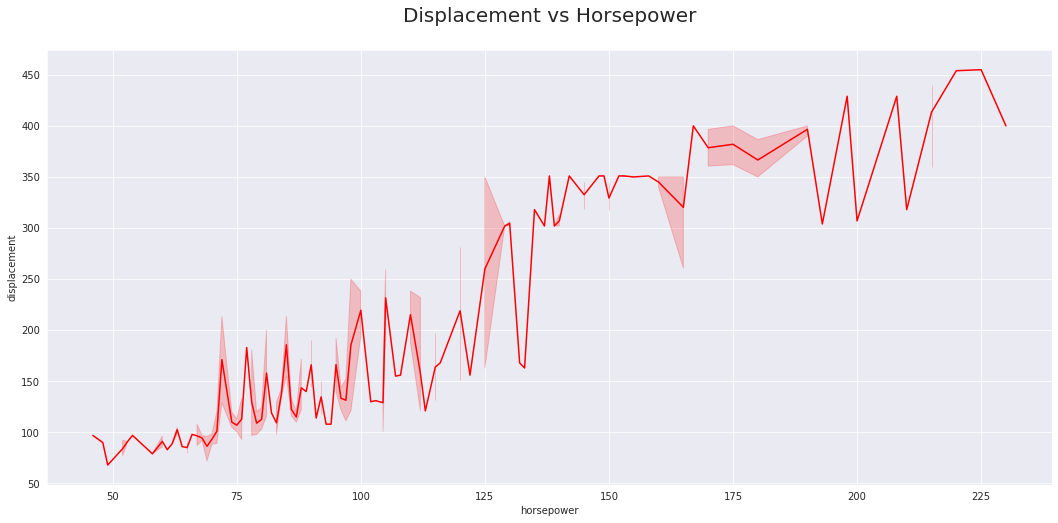

In [88]:
plt.figure(figsize=(18,8))
sns.lineplot(x='horsepower', y='displacement', 
                 data=df, 
                
                 color='red')
plt.title('Displacement vs Horsepower\n',size=20)

Text(0.5, 1.0, 'Car weight vs acceleration\n')

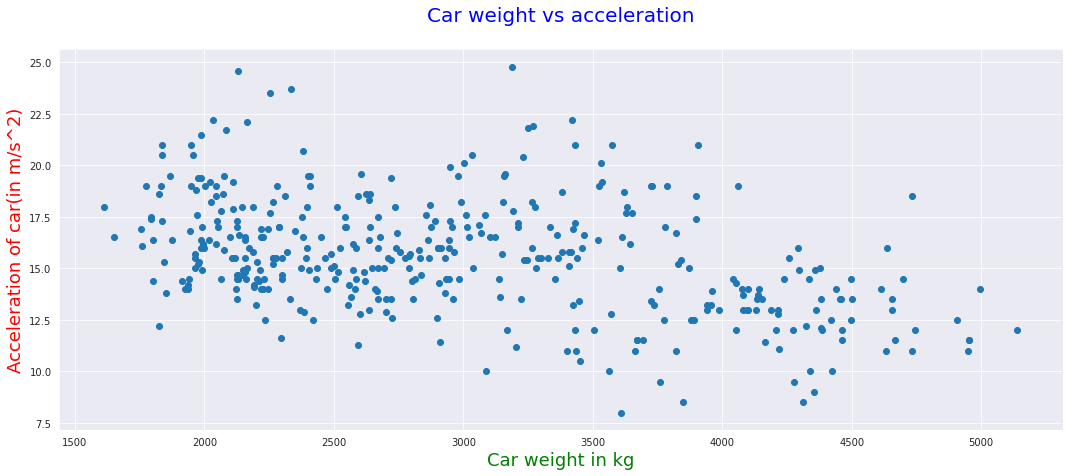

In [11]:
plt.figure(figsize=(18,7))
plt.scatter(df['weight'],df['acceleration'])
plt.xlabel('Car weight in kg',size=18,color='green')
plt.ylabel('Acceleration of car(in m/s^2)',size=18,color='red')
plt.title('Car weight vs acceleration\n',size=20,color='blue')

Text(0.5, 1.0, 'Number of cylinders used in a car\n')

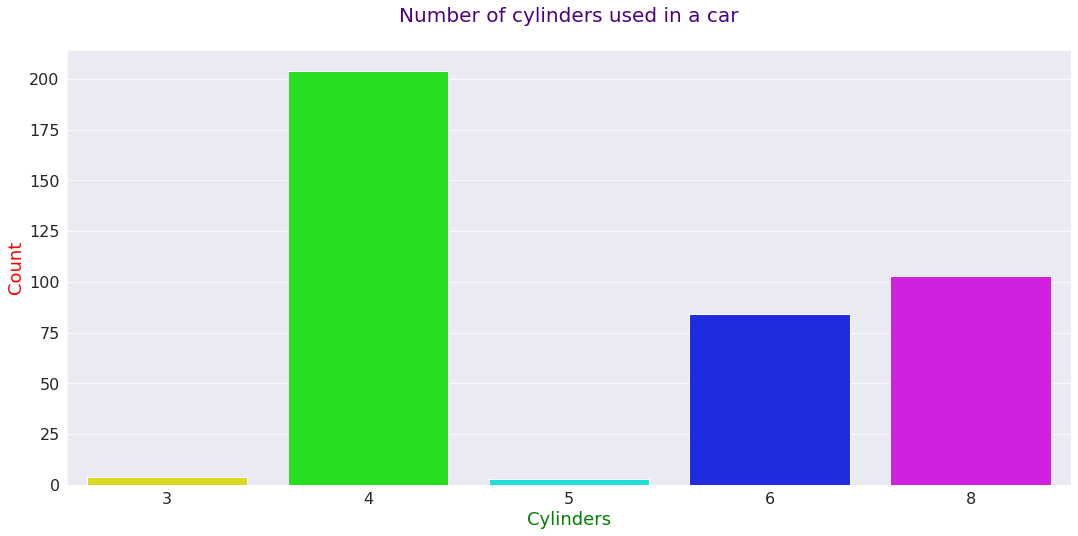

In [12]:
plt.figure(figsize=(18,8))
sns.countplot(x=df['cylinders'],palette='hsv')
plt.xlabel('Cylinders',size=18,color='green')
plt.xticks(size=16)
plt.ylabel('Count',size=18,color='red')
plt.yticks(size=16)
plt.title('Number of cylinders used in a car\n',size=20,color='indigo')

Text(0.5, 1.0, 'Mile per gallon vs number of cylinders used in a car\n')

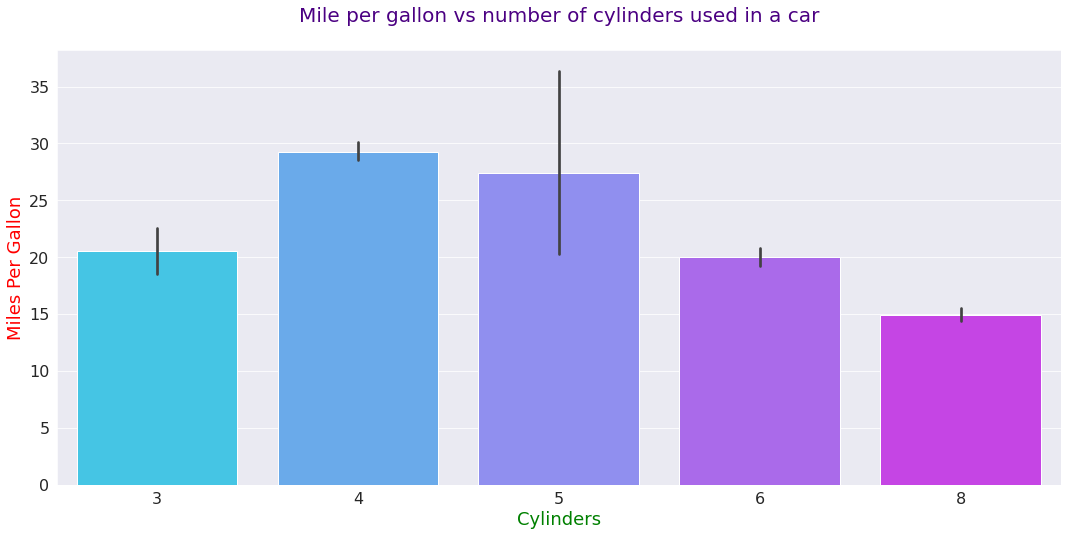

In [13]:
plt.figure(figsize=(18,8))
sns.barplot(x=df['cylinders'],y=df['mpg'],palette='cool')
plt.xlabel('Cylinders',size=18,color='green')
plt.xticks(size=16)
plt.ylabel('Miles Per Gallon',size=18,color='red')
plt.yticks(size=16)
plt.title('Mile per gallon vs number of cylinders used in a car\n',size=20,color='indigo')

Text(0.5, 1.0, 'Miles per gallon vs Horsepower\n')

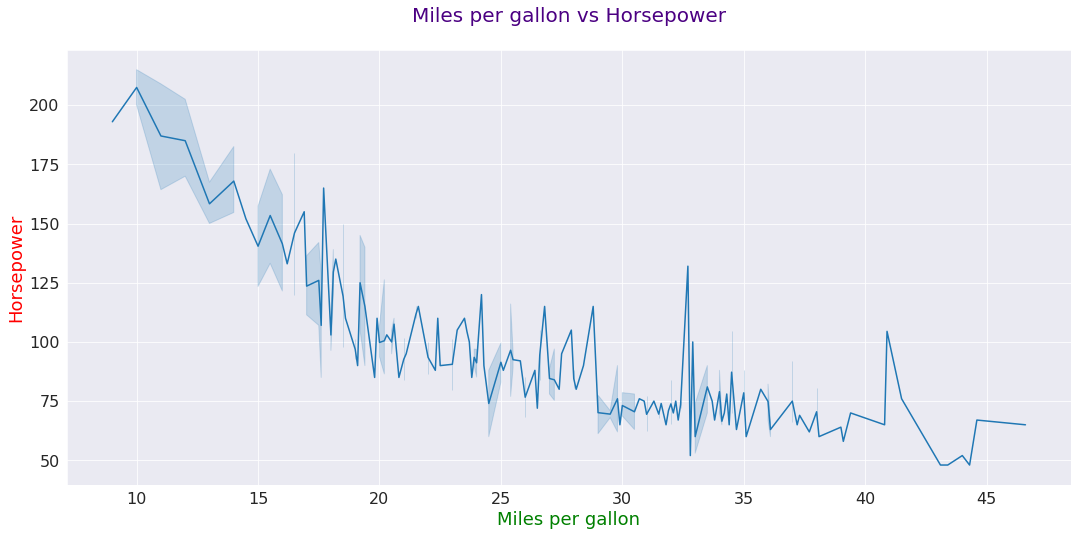

In [14]:
plt.figure(figsize=(18,8))
sns.lineplot(x=df['mpg'],y=df['horsepower'],palette='hsv')
plt.xlabel('Miles per gallon',size=18,color='green')
plt.xticks(size=16)
plt.ylabel('Horsepower',size=18,color='red')
plt.yticks(size=16)
plt.title('Miles per gallon vs Horsepower\n',size=20,color='indigo')

Text(0.5, 1.0, 'Distribution of car weights\n')

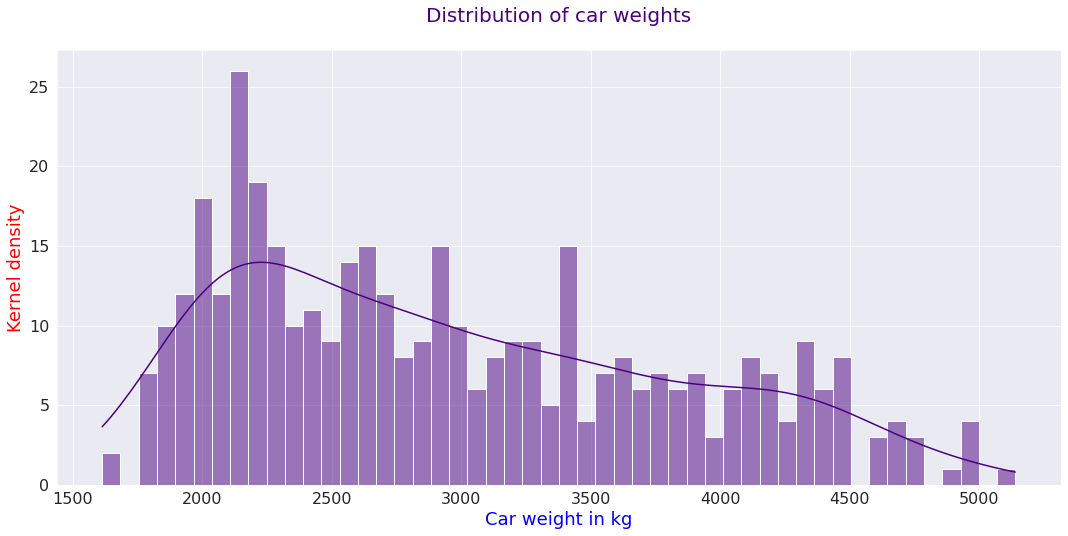

In [15]:
plt.figure(figsize=(18,8))
sns.histplot(df['weight'],kde=True,color='indigo',bins=50)
plt.xlabel('Car weight in kg',size=18,color='blue')
plt.xticks(size=16)
plt.ylabel('Kernel density',size=18,color='red')
plt.yticks(size=16)
plt.title('Distribution of car weights\n',size=20,color='indigo')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


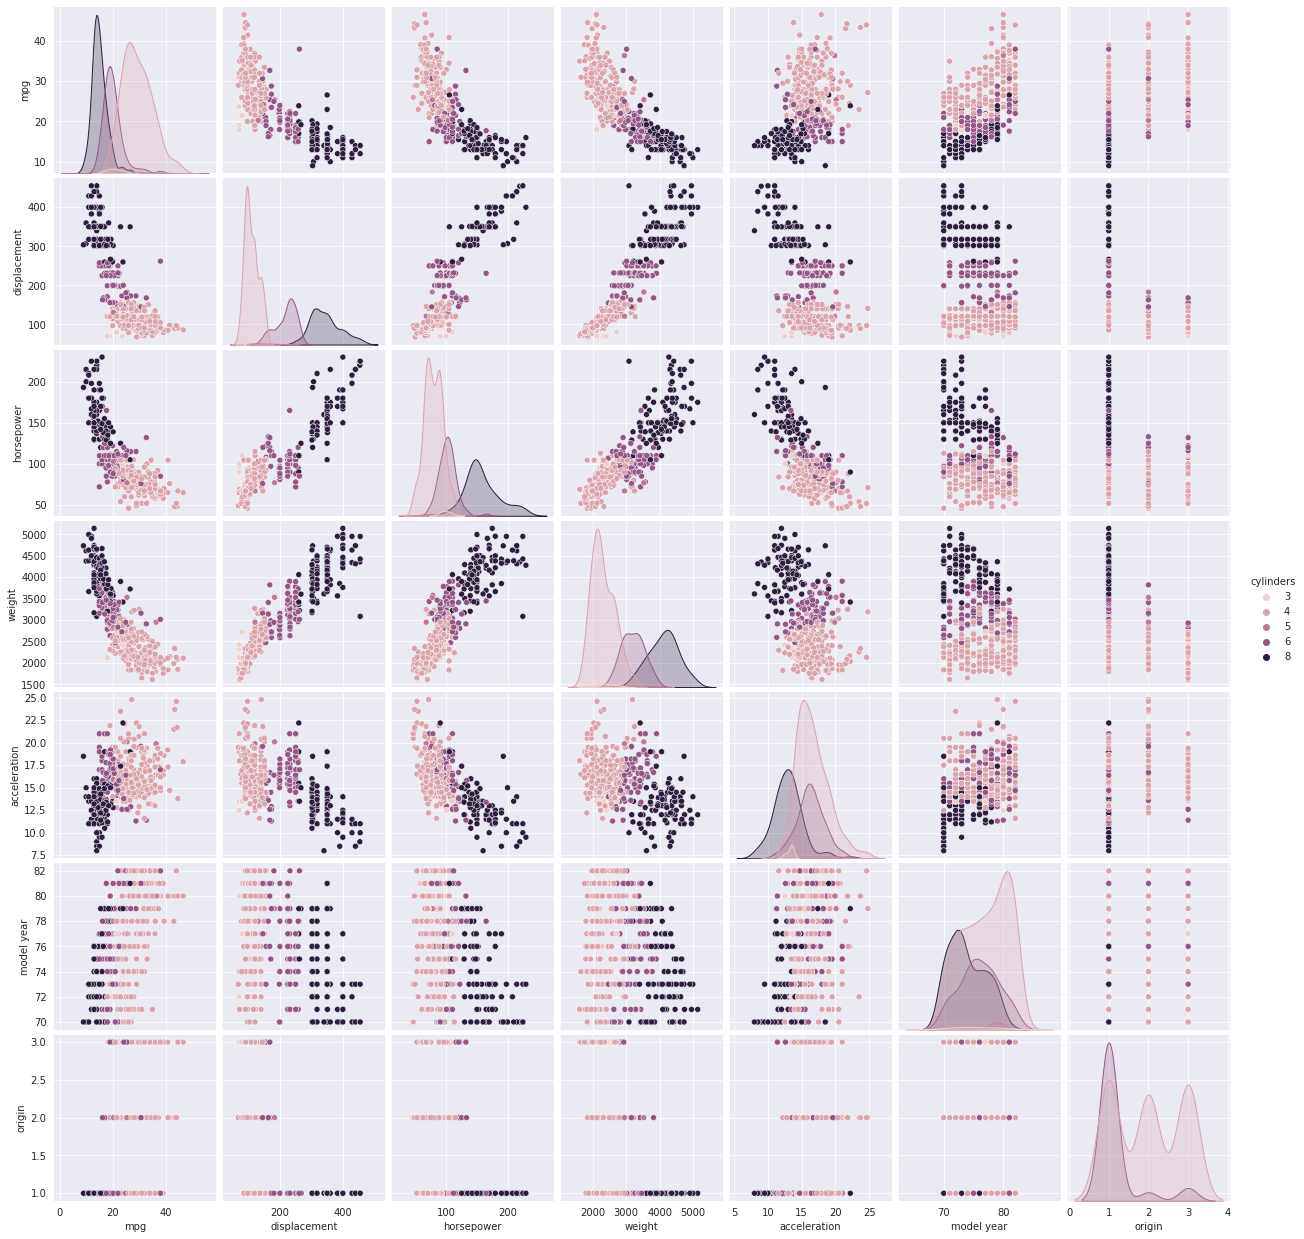

In [16]:
sns.pairplot(data=df,hue='cylinders')

Text(0.5, 1.0, 'Spearman correlation of various features of car\n')

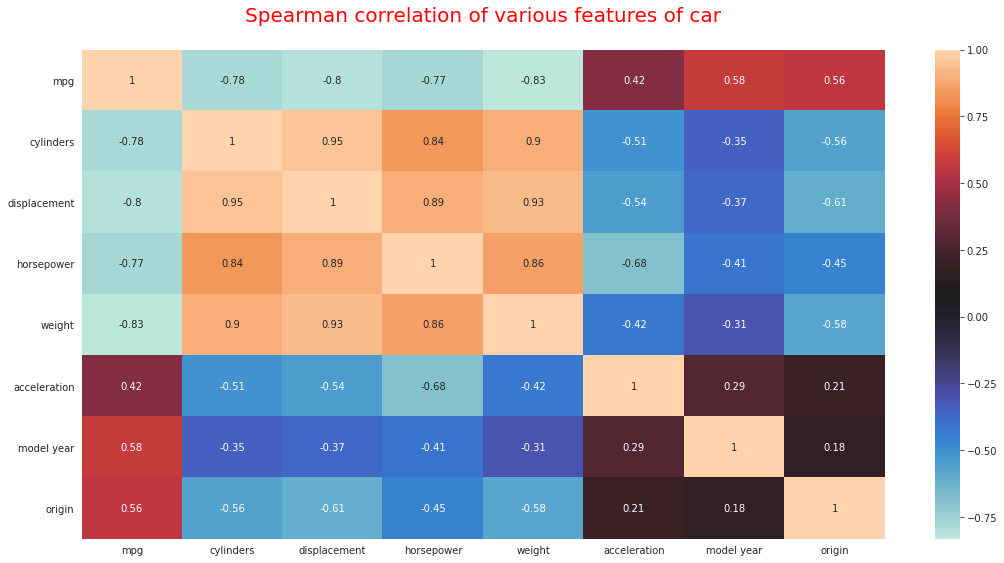

In [ ]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(),annot=True,cmap='icefire')
plt.title('Spearman correlation of various features of car\n',size=20,color='red')

In [20]:
X = df.iloc[:,0].values.reshape(-1,1)
y = df.iloc[:,5].values

y = y.reshape(len(y),1)


In [22]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)


In [23]:
# Training the SVR model on the whole dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [24]:

# Predicting a new result
sc_y.inverse_transform(regressor.predict(sc_X.transform([[12.5]])))

array([0.22829882])

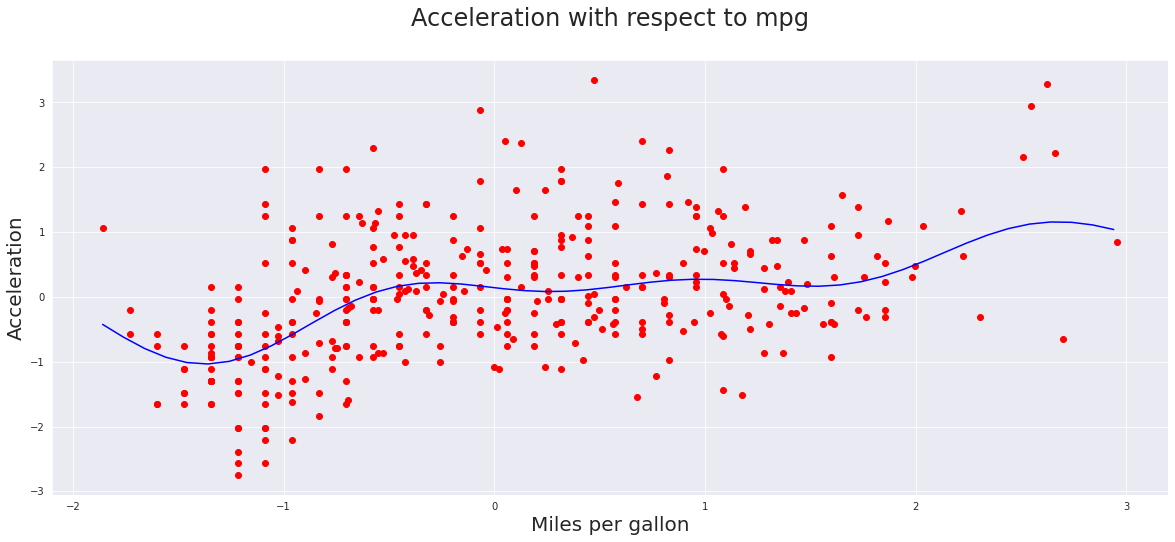

In [27]:
plt.figure(figsize=(20,8))
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Acceleration with respect to mpg\n',size=24)
plt.xlabel('Miles per gallon',size=20)
plt.ylabel('Acceleration',size=20)
plt.show()

## The Final Showdown

### Most powerful cars of the sample

In [56]:
df0 = df[(df['horsepower'] > 200)].values
df0 = pd.DataFrame(df0)
df0

,0,1,2,3,4,5,6,7,8
0,14,8,454,220,4354,9,70,1,chevrolet impala
1,14,8,440,215,4312,8.5,70,1,plymouth fury iii
2,14,8,455,225,4425,10,70,1,pontiac catalina
3,14,8,455,225,3086,10,70,1,buick estate wagon (sw)
4,10,8,360,215,4615,14,70,1,ford f250
5,11,8,318,210,4382,13.5,70,1,dodge d200
6,11,8,429,208,4633,11,72,1,mercury marquis
7,13,8,440,215,4735,11,73,1,chrysler new yorker brougham
8,12,8,455,225,4951,11,73,1,buick electra 225 custom
9,16,8,400,230,4278,9.5,73,1,pontiac grand prix


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Most Powerful Cars of the Sample\n')

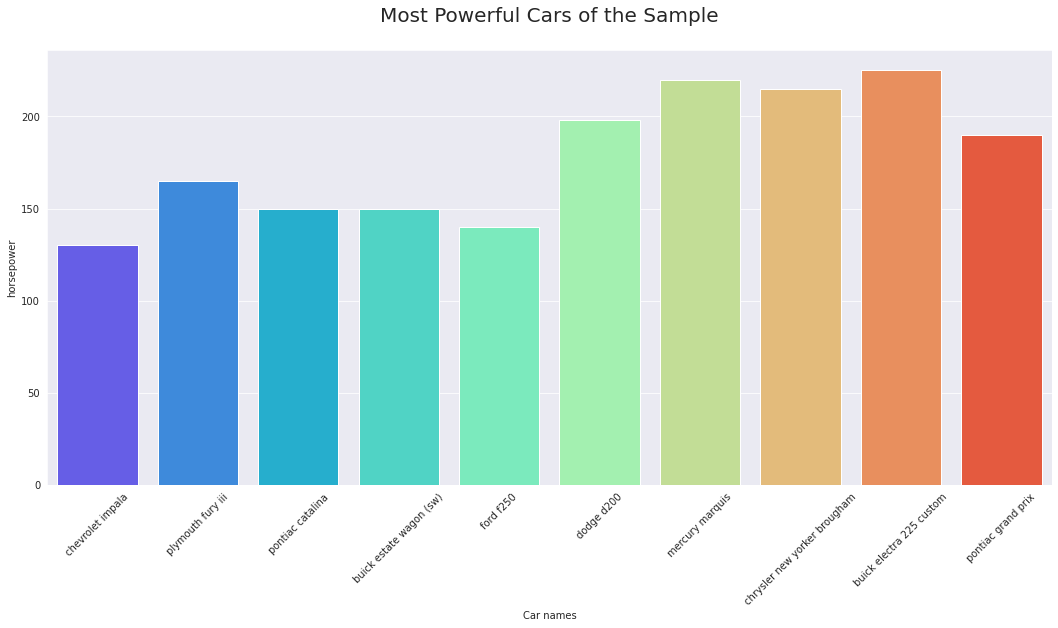

In [92]:
plt.figure(figsize=(18,8))
sns.barplot(df0.iloc[:,-1],df.iloc[:,3],palette='rainbow')
plt.xticks(rotation=45)
plt.xlabel('Car names')
plt.title('Most Powerful Cars of the Sample\n',size=20)

### heaviest cars of the sample

In [66]:
df1 = df[(df['acceleration'] > 22)].values
df1 = pd.DataFrame(df1)
df1

,0,1,2,3,4,5,6,7,8
0,23,4,97,54,2254,23.5,72,2,volkswagen type 3
1,29,4,85,52,2035,22.2,76,1,chevrolet chevette
2,24.5,4,98,60,2164,22.1,76,1,chevrolet woody
3,27.2,4,141,71,3190,24.8,79,2,peugeot 504
4,23.9,8,260,90,3420,22.2,79,1,oldsmobile cutlass salon brougham
5,43.4,4,90,48,2335,23.7,80,2,vw dasher (diesel)
6,44,4,97,52,2130,24.6,82,2,vw pickup


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Cars with highest pickup\n')

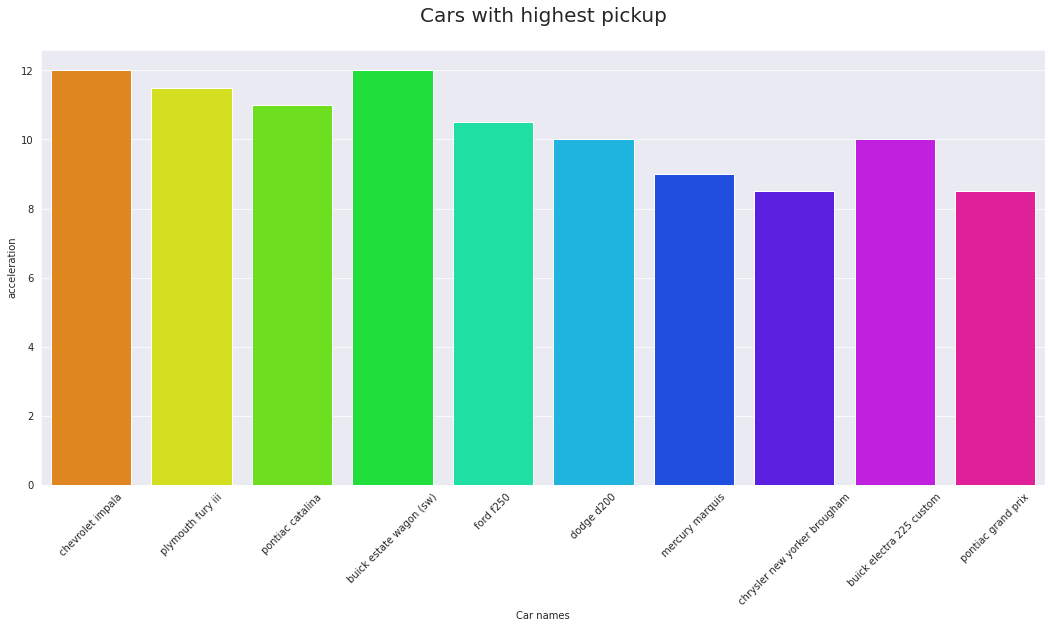

In [93]:
plt.figure(figsize=(18,8))
sns.barplot(df0.iloc[:,-1],df.iloc[:,5],palette='hsv')
plt.xticks(rotation=45)
plt.xlabel('Car names')
plt.title('Cars with highest pickup\n',size=20)

In [69]:
df2 = df[(df['mpg'] > 15)].values
df2 = pd.DataFrame(df1)
df2

,0,1,2,3,4,5,6,7,8
0,23,4,97,54,2254,23.5,72,2,volkswagen type 3
1,29,4,85,52,2035,22.2,76,1,chevrolet chevette
2,24.5,4,98,60,2164,22.1,76,1,chevrolet woody
3,27.2,4,141,71,3190,24.8,79,2,peugeot 504
4,23.9,8,260,90,3420,22.2,79,1,oldsmobile cutlass salon brougham
5,43.4,4,90,48,2335,23.7,80,2,vw dasher (diesel)
6,44,4,97,52,2130,24.6,82,2,vw pickup


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Most fuel efficient cars\n')

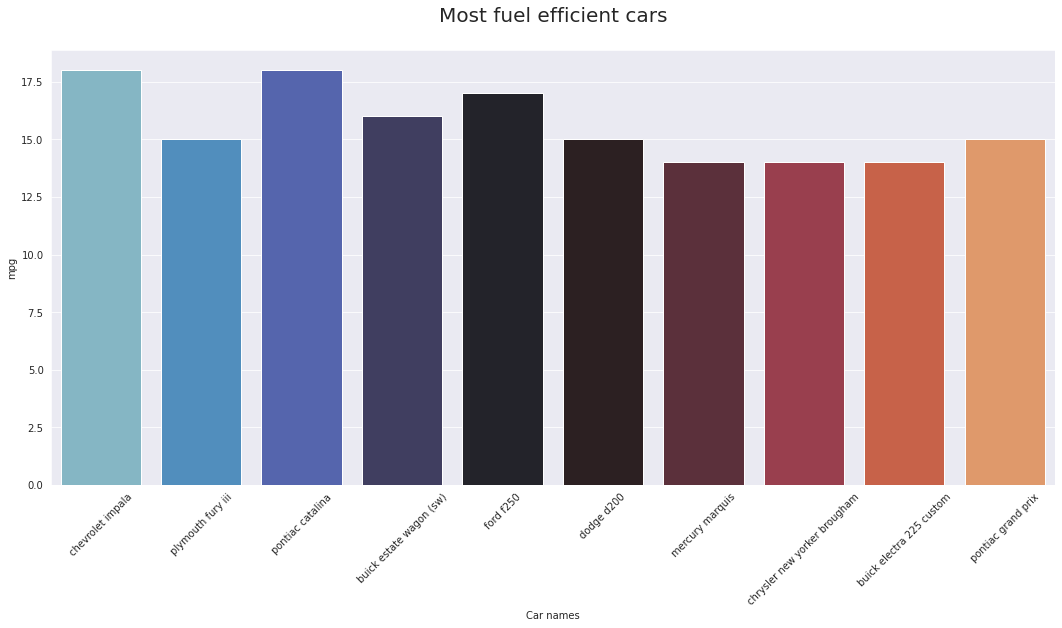

In [94]:
plt.figure(figsize=(18,8))
sns.barplot(df0.iloc[:,-1],df.iloc[:,0],palette='icefire')
plt.xticks(rotation=45)
plt.xlabel('Car names')
plt.title('Most fuel efficient cars\n',size=20)

## CONCLUSION:



### From this analysis project we can conclude that acceleration of a car is directly proportional to the number of cylinders and inversely proportional to the car weight. The milage of a car depends on factors like it's weight, displacement and cylinders. So, the best buy of a car, which complies most of the important factors would be "Volkswagen type 3" and "Chevrolet Chevette".

### Considering company as a criteria, "Volkswagen" and "Chevrolet" manufacture the best types of civilian and police cars with good milage and Highway acceleration.Good race cars are manufactured by "Chevrolet and Plymouth".